In [1]:
import sys
assert sys.version_info >= (3, 7)

Note that you need python 3.7 to have use datetime.datetime.fromisoformat()

In [2]:
import numpy as np
from functions import split
from functions import pipeline
from functions import load_data
from functions import compute_f1
from functions import corr_matrix
from functions import plot_feature
from functions import print_sample
from functions import convert_date
from functions import convert_type
from functions import print_feature
from functions import remove_missing
from functions import delete_feature
from functions import convert_one_hot
from functions import convert_weather
from functions import feature_output_corr
from functions import normalization_feature

# 0 Load data

In [3]:
header, data = load_data("data/training.csv")

# 1 Data preprocessing

## 1.1 Remove features with mostly missing values

In [4]:
print_feature(header, data, 3)

--------------------------------------------------
(00) Date/Hour (8497)
--------------------------------------------------
2016-08-31 23:00 :        182 ( 0.0%)
2016-08-31 22:00 :        182 ( 0.0%)
2016-08-31 21:00 :        182 ( 0.0%)
2016-08-31 20:00 :        182 ( 0.0%)
--------------------------------------------------
(01) Temperature (°C) (358)
--------------------------------------------------
19,0       :      11830 ( 0.8%)
21,5       :      11648 ( 0.8%)
21,1       :      11648 ( 0.8%)
21,0       :      11648 ( 0.8%)
--------------------------------------------------
(02) Drew point (°C) (372)
--------------------------------------------------
16,2       :      13286 ( 0.9%)
16,0       :      13286 ( 0.9%)
15,3       :      12740 ( 0.8%)
14,5       :      12194 ( 0.8%)
--------------------------------------------------
(03) Relativite humidity (%) (89)
--------------------------------------------------
73         :      35126 ( 2.3%)
67         :      30576 ( 2.0%)
61       

 * We can remove the feature without values in over 50% of samples. 

 * We decide to keep Weather as it is discrete and we can easily replace it with a one-hot vector. 

 * We also need to remove Withdrawals that is not available in test data.

In [5]:
header, data = delete_feature(header, data, "Visility indicator")
header, data = delete_feature(header, data, "hmdx")
header, data = delete_feature(header, data, "Wind Chill")

In [6]:
print(data.shape)
print(header)

(1546454, 13)
['Date/Hour' 'Temperature (°C)' 'Drew point (°C)'
 'Relativite humidity (%)' 'wind direction (10s deg)' 'Wind speed (km/h)'
 'Visibility (km)' 'Pressure at the station (kPa)' 'Weather'
 'Public Holiday' 'Station Code' 'Withdrawals' 'Volume']


## 1.2 Convert Date to Year, Month, Day, Hour

In the date we can extract several informations : the Year, the Month, the day, and the hour.

From this, we can also deduce a useful information : the day of the week (if it's Monday, Tuesday, etc.).

In [7]:
header, data = convert_date(header, data)

In [8]:
print(data.shape)
print(header)

(1546454, 17)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Weather' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Year' 'Month' 'Day' 'Hour' 'Weekday']


### 1.2.1 One Hot encoding for Year and Month

In [9]:
header, data = convert_one_hot(header, data, "Year")
header, data = convert_one_hot(header, data, "Month")
header, data = convert_one_hot(header, data, "Weekday")

In [10]:
print(data.shape)
print(header)

(1546454, 31)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Weather' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Year 2015' 'Year 2016' 'Month 10'
 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8' 'Month 9'
 'Weekday 0' 'Weekday 1' 'Weekday 2' 'Weekday 3' 'Weekday 4' 'Weekday 5'
 'Weekday 6']


## 1.3 Convert Weather to binary vector

In [11]:
weather = [
    'Orages', 'Brouillard', 'Bruine', 'Généralement dégagé',
    'Généralement nuageux', 'Pluie', 'Pluie modérée', 'Pluie forte', 'Dégagé',
    'Nuageux', 'Neige'
]

header, data = convert_weather(header, data, weather)

In [12]:
print(data.shape)
print(header)

(1546454, 41)
['Temperature (°C)' 'Drew point (°C)' 'Relativite humidity (%)'
 'wind direction (10s deg)' 'Wind speed (km/h)' 'Visibility (km)'
 'Pressure at the station (kPa)' 'Public Holiday' 'Station Code'
 'Withdrawals' 'Volume' 'Day' 'Hour' 'Year 2015' 'Year 2016' 'Month 10'
 'Month 11' 'Month 4' 'Month 5' 'Month 6' 'Month 7' 'Month 8' 'Month 9'
 'Weekday 0' 'Weekday 1' 'Weekday 2' 'Weekday 3' 'Weekday 4' 'Weekday 5'
 'Weekday 6' 'Orages' 'Brouillard' 'Bruine' 'Généralement dégagé'
 'Généralement nuageux' 'Pluie' 'Pluie modérée' 'Pluie forte' 'Dégagé'
 'Nuageux' 'Neige']


## 1.4 Remove samples with missing values

In [13]:
# samples with at least one missing value
missing = [d for d in data if "" in d]
print(len(missing))

# number of class 1 with missing value
index = np.where(header == "Volume")
print(sum(["1" in d[index] for d in missing]))

2184
174


In [14]:
data = remove_missing(data)

In [15]:
print(data.shape)

(1544270, 41)


## 1.5 Convert feature type from string to float (

In [16]:
data = convert_type(data)

## 1.5 Normalization of continuous data

The concerned features are : Temperature, Drew point, Relativite humidity, wind direction, Wind speed, and Pressure at the station

In [17]:
normalization_feature(header, data, "Temperature (°C)")
normalization_feature(header, data, "Drew point (°C)")
normalization_feature(header, data, "Relativite humidity (%)")
normalization_feature(header, data, "wind direction (10s deg)")
normalization_feature(header, data, "Wind speed (km/h)")
normalization_feature(header, data, "Pressure at the station (kPa)")

## 1.6 Get x, y (withdrawals) and label (volume)

In [18]:
header, x, y, label = split(header, data)

# 2 Data analysis & visualization

## 2.1 Distribution of the features

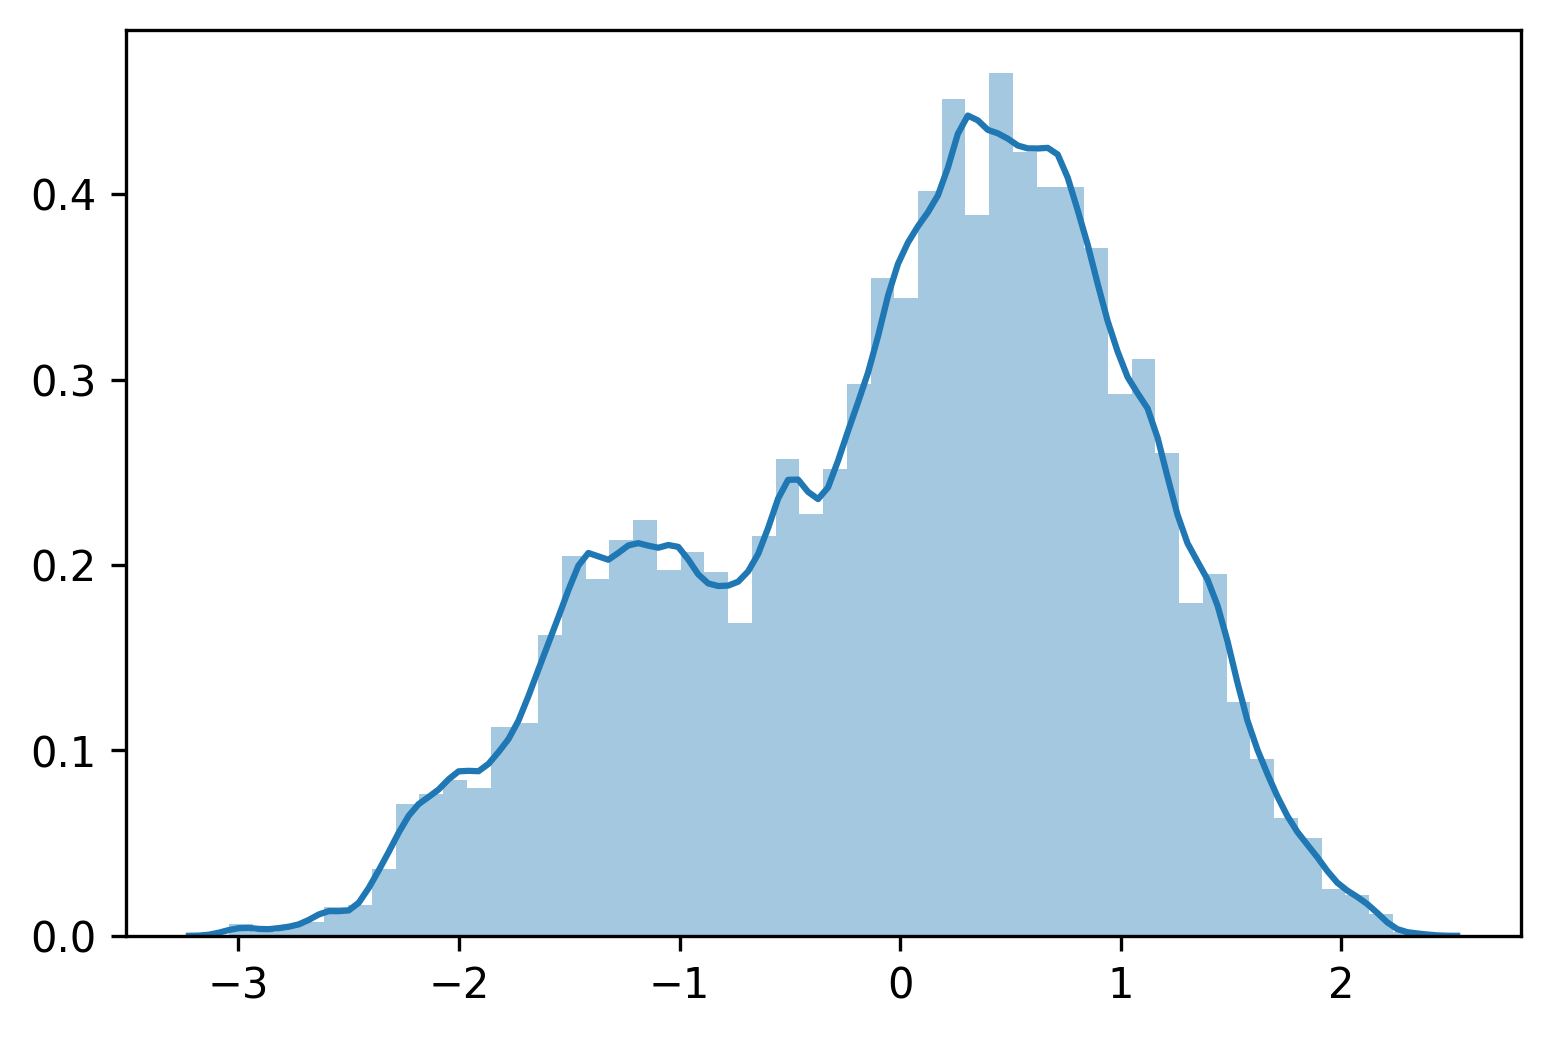

In [19]:
plot_feature(header, x, "Temperature (°C)")

## 2.2 Correlation of features and output

In [20]:
feature_output_corr(header, x, y, 10)

Temperature (°C)               :  0.331
Relativite humidity (%)        : -0.294
Hour                           :  0.288
Visibility (km)                :  0.233
Drew point (°C)                :  0.116
Wind speed (km/h)              :  0.107
Pluie                          : -0.095
Year 2016                      :  0.088
Year 2015                      : -0.088
Month 4                        : -0.087


In [21]:
feature_output_corr(header, x, label, 10)

Temperature (°C)               :  0.198
Relativite humidity (%)        : -0.167
Hour                           :  0.146
Visibility (km)                :  0.139
Drew point (°C)                :  0.073
Year 2016                      :  0.062
Year 2015                      : -0.062
Wind speed (km/h)              :  0.062
Month 4                        : -0.056
Month 10                       : -0.055


### 2.3 Correlation matrix of the features

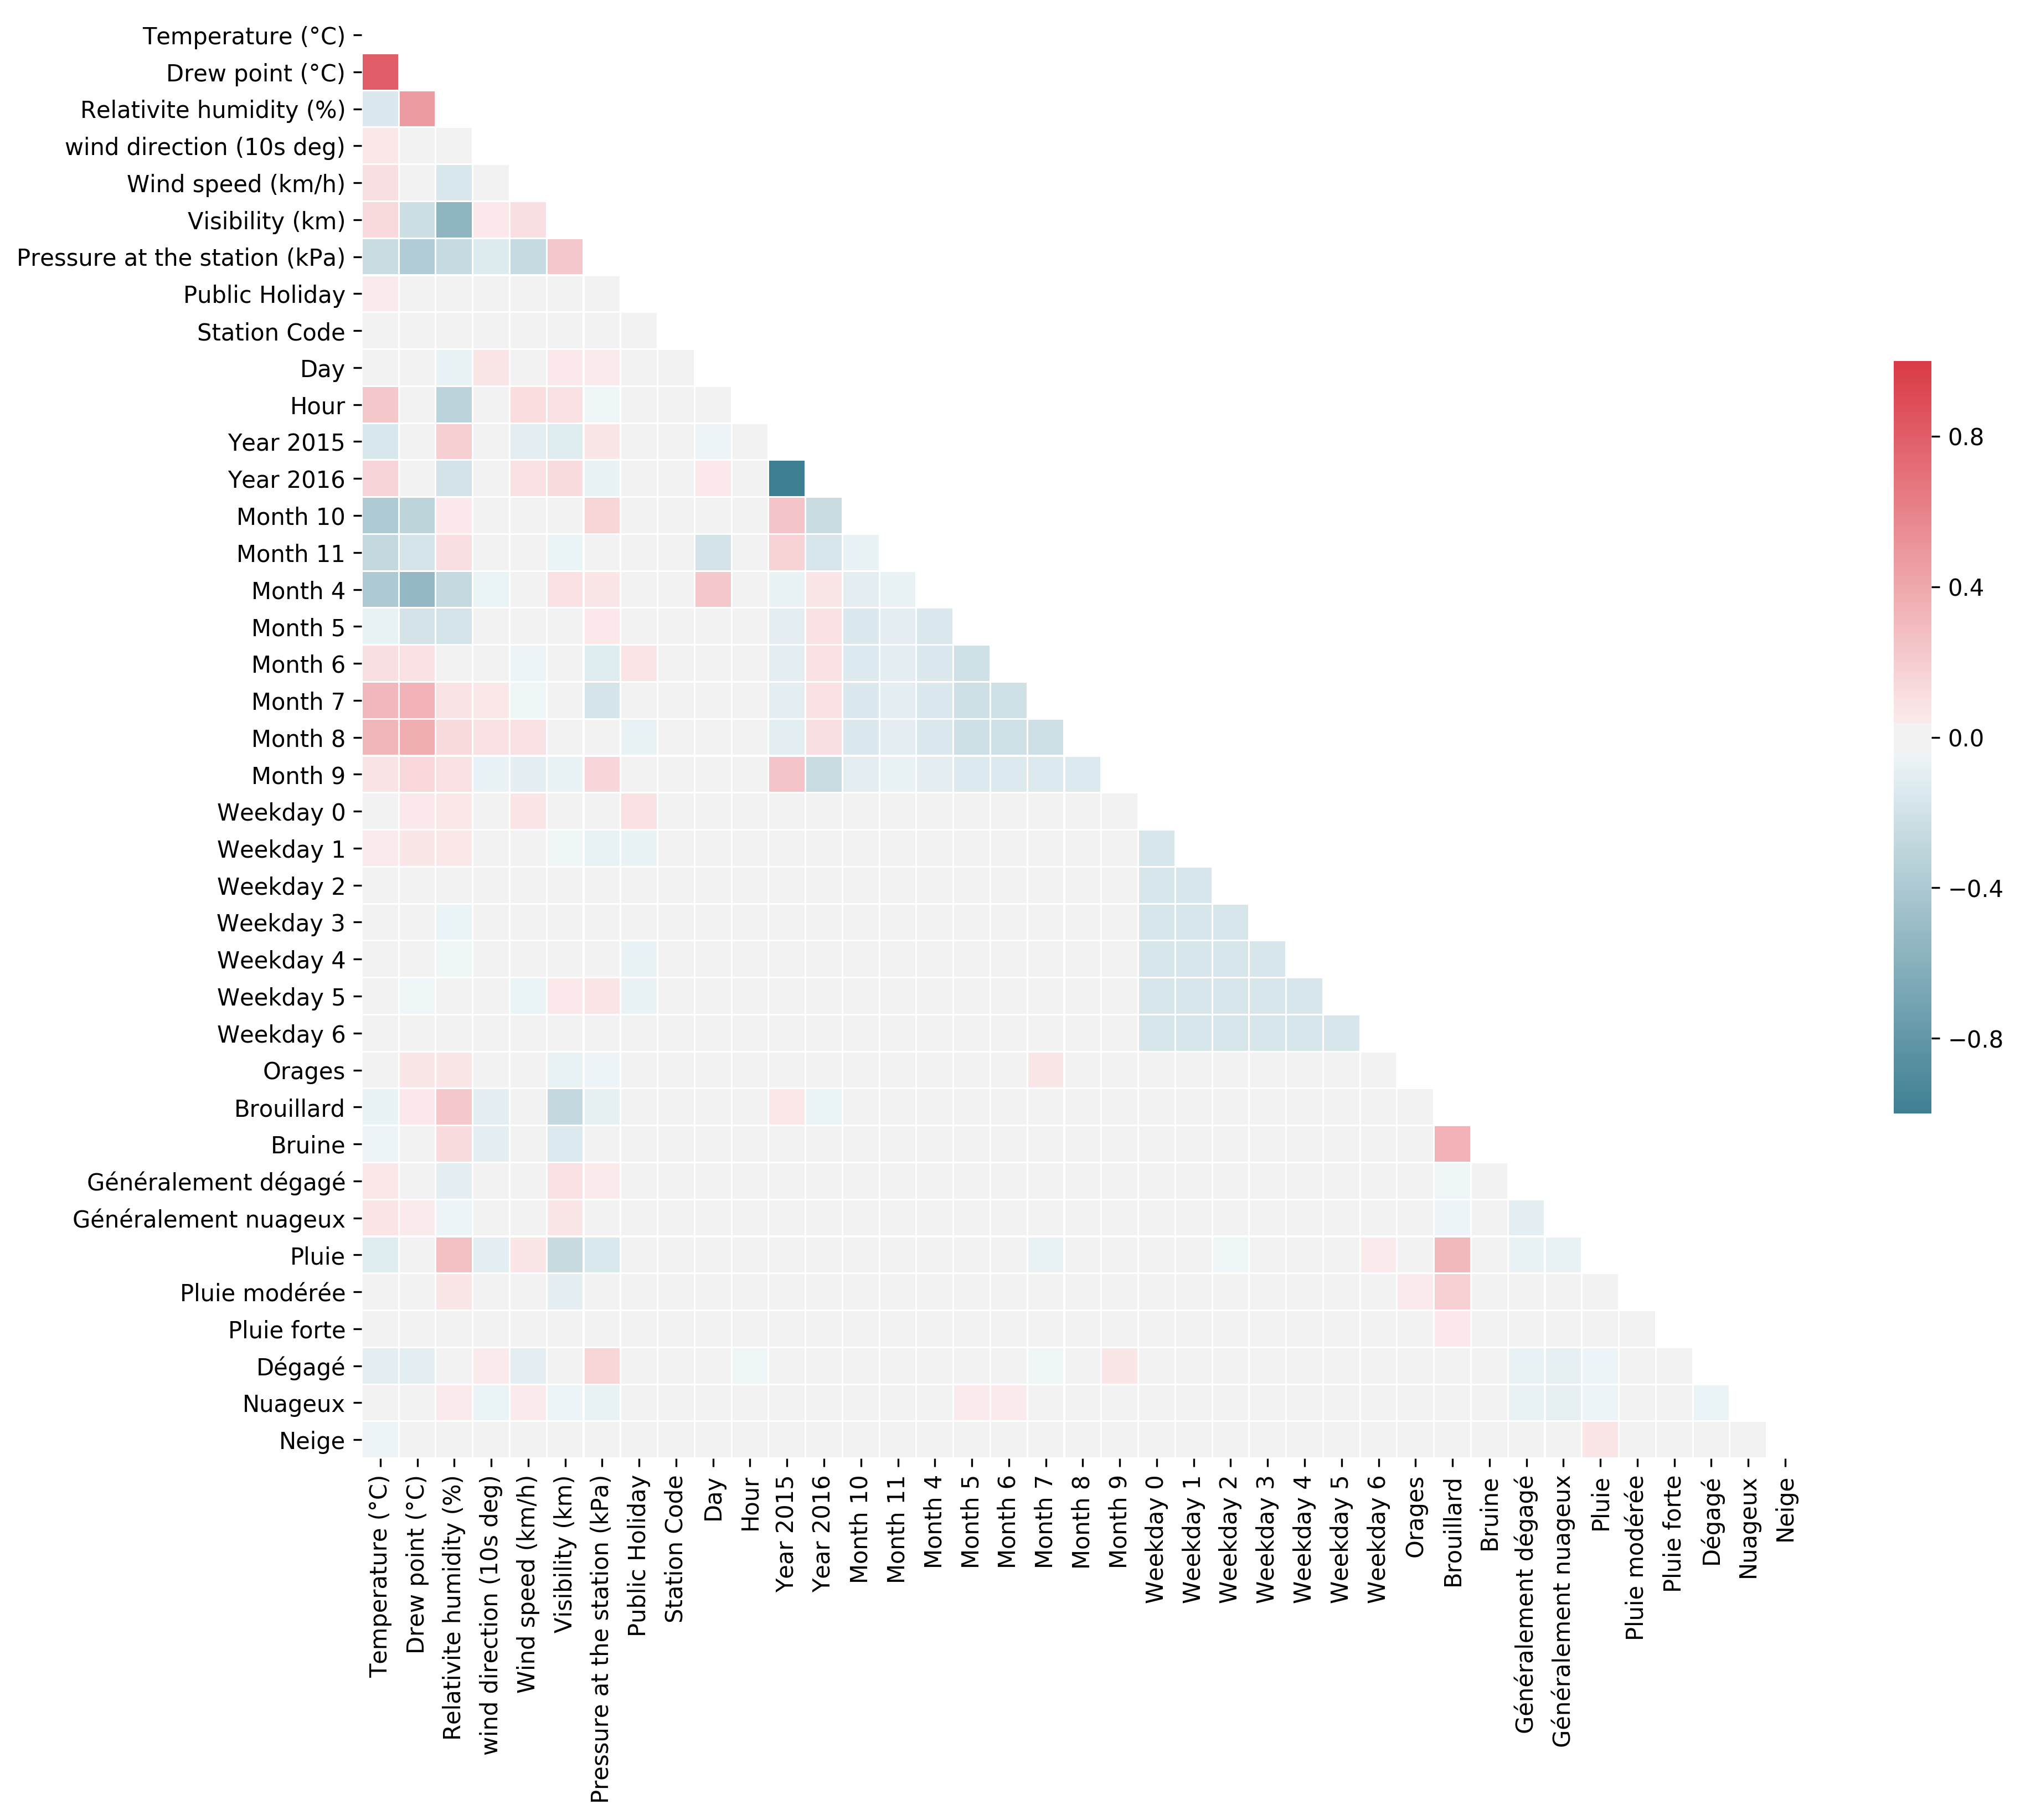

In [22]:
corr_matrix(header, x)